In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydaptivefiltering as pdf

def demo_volterra_rls_system(n_samples=2000, noise_std=0.05):
    rng = np.random.default_rng(2026)
    x = rng.standard_normal(n_samples)
    
    # Sistema: d(k) = 0.8*x(k) - 0.5*x(k-1) + 0.3*x(k)^2 - 0.4*x(k)*x(k-1)
    # Coeficientes alvo: [0.8, -0.5, 0.0, 0.3, -0.4, 0.0, 0.0, 0.0, 0.0]
    # (seguindo a ordem do seu _create_volterra_regressor)
    d = np.zeros(n_samples)
    for k in range(2, n_samples):
        lin = 0.8 * x[k] - 0.5 * x[k-1]
        quad = 0.3 * (x[k]**2) - 0.4 * x[k] * x[k-1]
        d[k] = lin + quad + noise_std * rng.standard_normal()
        
    return x, d

In [2]:
# 1. Dados
x, d = demo_volterra_rls_system()

# 2. Instanciar Volterra RLS
# memory=3 -> 9 coeficientes. delta=0.1 é uma boa escolha inicial.
v_rls = pdf.VolterraRLS(memory=3, forgetting_factor=0.99, delta=0.1)

# 3. Processar
res = v_rls.optimize(x, d, verbose=True)

# 4. Resultados
y = res['outputs']
e = res['errors']
w_final = res['coefficients'][-1]

print(f"MSE Final: {np.mean(e[-200:]**2):.6f}")

Volterra RLS Adaptation completed in 22.445 ms
MSE Final: 0.002738


C:\Users\bruno\Documents\DSc\codes\PydaptiveFiltering\pydaptivefiltering\nonlinear\volterra_rls.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y[k] = np.dot(self.w, uxl)


C:\Users\bruno\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\bruno\anaconda3\Lib\site-packages\numpy\ma\core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\bruno\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


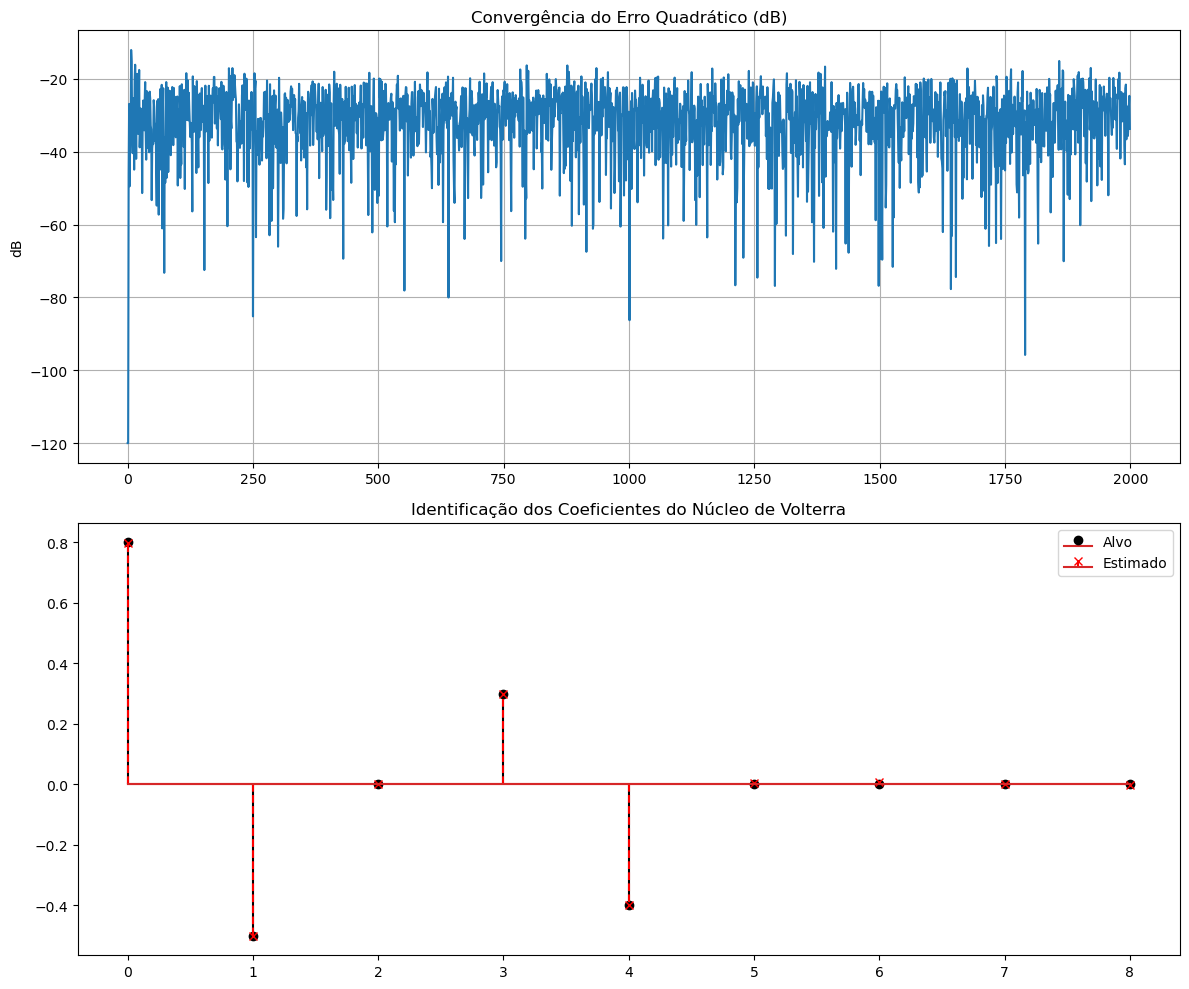

In [3]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Curva de Aprendizado em dB
ax[0].plot(10 * np.log10(e**2 + 1e-12), label='Volterra RLS')
ax[0].set_title("Convergência do Erro Quadrático (dB)")
ax[0].set_ylabel("dB")
ax[0].grid(True)

# Comparação de Pesos
w_target = np.array([0.8, -0.5, 0.0, 0.3, -0.4, 0.0, 0.0, 0.0, 0.0])
ax[1].stem(w_target, linefmt='k-', markerfmt='ko', label='Alvo')
ax[1].stem(w_final, linefmt='r--', markerfmt='rx', label='Estimado')
ax[1].set_title("Identificação dos Coeficientes do Núcleo de Volterra")
ax[1].legend()

plt.tight_layout()
plt.show()